In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
import math

In [20]:
import seaborn as sns

In [21]:
def u(x,a,s):
    if a == 0:
        return (1/6*s)*x + 0.5
    else: 
        def b(x):
            return 1-math.e**(-a*x)
        return (b(x)-b(-3*s))/(b(3*s)-b(-3*s))

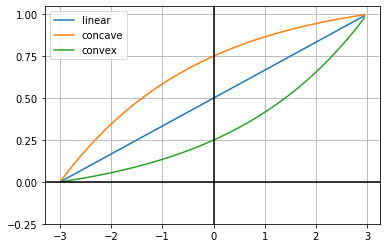

In [22]:
X = np.arange(-3,3,0.05)
Y1 = [u(x,0.367,1) for x in X]
Y2 = [u(x,-0.367,1) for x in X]
Y3 = [u(x,0,1) for x in X] 
plt.plot(X,Y3, label='linear') 
plt.plot(X,Y1, label='concave') 
plt.plot(X,Y2, label='convex') 
plt.axvline(0, color='k')
plt.axhline(0, color='k')

import matplotlib.ticker as plticker


plt.yticks(np.arange(-.25, 1.25, 0.25))

plt.grid(which='major', axis='both', linestyle='-')
plt.legend()

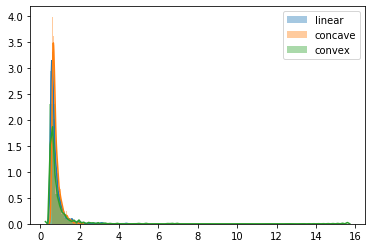

In [23]:
nor_x = np.random.lognormal(0,1,1000)
sns.distplot(us(nor_x, 0, 1), label='linear')
sns.distplot(us(nor_x, 0.1, 1), label='concave')
sns.distplot(us(nor_x, -0.1, 1), label='convex')
plt.legend()

In [24]:
def us(x_list, a, s): #utility function for the list of values           
    return [u(x, a, s) for x in x_list]

In [25]:
def cal_post(m, mu=0, s=1, t=1, a=0):
    d_list = []
    for i in range(10000):
        #Generate $m$ true values $x_j$ from the prior
        x = np.random.lognormal(mu,s,m) #x_j~N(0,1)
        
        #For each true value, generate an estimate $y_j$ from the likelihood 
        y = [np.random.lognormal(math.log(x_j)-((t**2)/2),t,1)[0] for x_j in x] #y_j~N(x_j,1)

        #For each $y_j$, generate 1000 true values $x_jk$ from $(X|Y=y)=N(sigma^2/(tau^2 +sigma^2)*y_j+tau^2/(sigma^2+tau^2)*overline(mu)), k=1,...1000$
        x_p = []
        for y_j in y:
            p_mean = (t**2/(s**2 + t**2))*mu + (s**2/(s**2 + t**2))*(math.log(y_j)+((t**2)/2))
            p_std = (s**2*t**2/(s**2 + t**2)) #caution! it is variance

            x_p.append(list(np.random.lognormal(p_mean, np.sqrt(p_std),1000)))


        #Compute $u(x_jk$) for all $j,k$
        u_x_p = [us(x, a, s) for x in x_p]

        #Compute the average $\sum_{k=1}^1000 u_(x_jk)$ to get an estimate for the expected utility $E[u(X_j)|Y_j=y_j]$
        eu = [np.mean(x) for x in u_x_p]

        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = (u(x[max_j],a, s) - max_eu)
        d_list.append(d)
    #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list


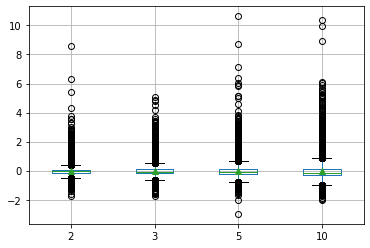

2    -0.001162
3    -0.007857
5    -0.000738
10   -0.003814
dtype: float64


In [26]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post(m, a=0)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

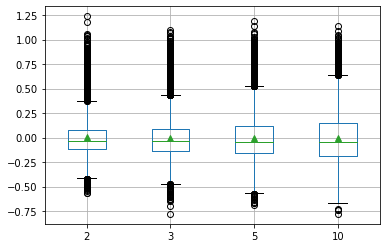

2     0.004186
3     0.000865
5    -0.000021
10    0.000579
dtype: float64


In [27]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post(m, a=0.1)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

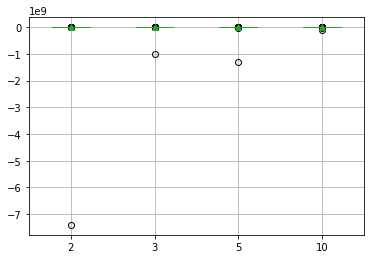

2    -740190.157845
3     -98648.450485
5    -133742.871233
10    -15016.739822
dtype: float64


In [70]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post(m, a=-0.1)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

Wrong way

In [48]:
def cal_post_wrong(m, mu=0, s=1, t=1, a=0):
    d_list = []
    for c in range(50000):

        #Generate $m$ true values $x_j$ from the prior
        x = np.random.lognormal(mu,s,m) #x_j~N(0,1)
        ux = us(x, a, 1)

        #For each true value, generate an estimate $y_j$ from the likelihood 
        y = [np.random.lognormal(math.log(x_j)-((t**2)/2),t,1)[0] for x_j in x] #y_j~N(x_j,1)

        #For each $y_j$, generate 1000 true values $x_jk$ from $(X|Y=y)=N(sigma^2/(tau^2 +sigma^2)*y_j+tau^2/(sigma^2+tau^2)*overline(mu)), k=1,...1000$
        x_p = []
        for y_j in y:
            p_mean = (t**2/(s**2 + t**2))*mu + (s**2/(s**2 + t**2))*(math.log(y_j)+((t**2)/2))
            p_std = (s**2*t**2/(s**2 + t**2)) #caution! it is variance
            
            x_p_list = np.random.lognormal(p_mean, np.sqrt(p_std), 1000)
            x_p.append(np.mean(x_p_list))

        eu = us(x_p, a, 1)

        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = ux[max_j] - max_eu 
        d_list.append(d)
    
    return d_list

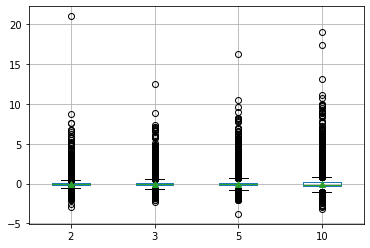

2     0.000842
3    -0.000734
5     0.000119
10   -0.002302
dtype: float64


In [49]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong(m, a=0)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

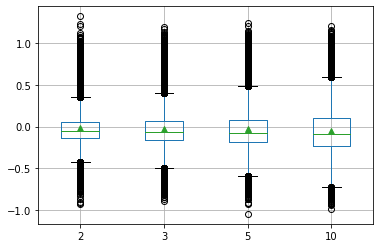

2    -0.021335
3    -0.026708
5    -0.034514
10   -0.049219
dtype: float64


In [69]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong(m, a=0.1)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

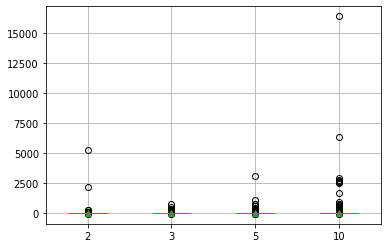

2     0.245487
3     0.181151
5     0.359419
10    1.293338
dtype: float64


In [52]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong(m, a=-0.1)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [71]:
def cal_post_r(mu=0, s=1, t=1, a=0):
    
    #Generate $m$ true values $x_j$ from the prior
    x = np.random.lognormal(mu,s,1)[0] #x_j~N(0,1)

    #For each true value, generate an estimate $y_j$ from the likelihood 
    y = np.random.lognormal(math.log(x)-((t**2)/2),t,1)[0]#y_j~N(x_j,1)

    #For each $y_j$, generate 1000 true values $x_jk$ from $(X|Y=y)=N(sigma^2/(tau^2 +sigma^2)*y_j+tau^2/(sigma^2+tau^2)*overline(mu)), k=1,...1000$

    p_mean = (t**2/(s**2 + t**2))*mu + (s**2/(s**2 + t**2))*(math.log(y)+((t**2)/2))
    p_std = (s**2*t**2/(s**2 + t**2)) #caution! it is variance

    #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    uxp_list = [math.log(xp) for xp in np.random.lognormal(p_mean, np.sqrt(p_std),1000)]
    return np.mean(uxp_list)

def cal_post_w(mu=0, s=1, t=1, a=0):

    #Generate $m$ true values $x_j$ from the prior
    x = np.random.lognormal(mu,s,1)[0] #x_j~N(0,1)

    #For each true value, generate an estimate $y_j$ from the likelihood 
    y = np.random.lognormal(math.log(x)-((t**2)/2),t,1)[0] #y_j~N(x_j,1)

    #For each $y_j$, generate 1000 true values $x_jk$ from $(X|Y=y)=N(sigma^2/(tau^2 +sigma^2)*y_j+tau^2/(sigma^2+tau^2)*overline(mu)), k=1,...1000$
    p_mean = (t**2/(s**2 + t**2))*mu + (s**2/(s**2 + t**2))*(math.log(y)+((t**2)/2))
    p_std = (s**2*t**2/(s**2 + t**2)) #caution! it is variance
            
    x_p_list = np.random.lognormal(p_mean, np.sqrt(p_std), 1000)
    return math.log(np.mean(x_p_list))


In [86]:
def d_cal(s, t):
    a = (s**2)/(s**2 + t**2)
    return - (1-a)*(0.5*(s**2))

In [72]:
d_list = []
for i in range(10000):
    d_list.append(cal_post_r()-cal_post_w())
    

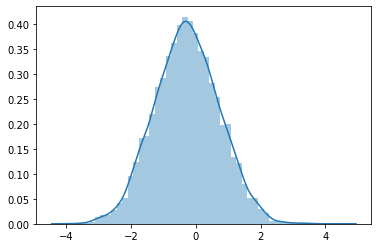

In [73]:
sns.distplot(d_list)

In [76]:
np.mean(d_list)

-0.27290071409079014

In [82]:
d_cal(1,1)

-0.25

In [78]:
d_list = []
for i in range(10000):
    d_list.append(cal_post_r(s=2)-cal_post_w(s=2))
    
np.mean(d_list)

-0.42131796377379194

In [83]:
d_cal(2,1)

-0.3999999999999999

In [84]:
d_list = []
for i in range(10000):
    d_list.append(cal_post_r(s=2, t=2)-cal_post_w(s=2, t=2))
    
np.mean(d_list)

-0.9966735619897865

In [85]:
d_cal(2,2)

-1.0

In [81]:
d_cal(1, 1)

-0.25